# Multiple linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [5]:
data=pd.read_csv(r"C:\Users\Hp\Downloads\ToyotaCorolla.csv",encoding= 'unicode_escape')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data=data.drop(columns=['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'])

In [8]:
data.shape

(1436, 9)

In [10]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


<AxesSubplot:>

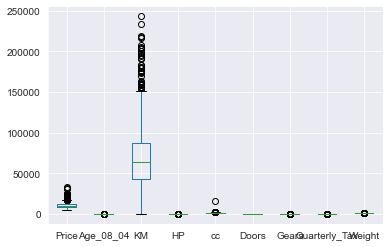

In [36]:
data.boxplot()

## Correlation 

In [13]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Pair plot 

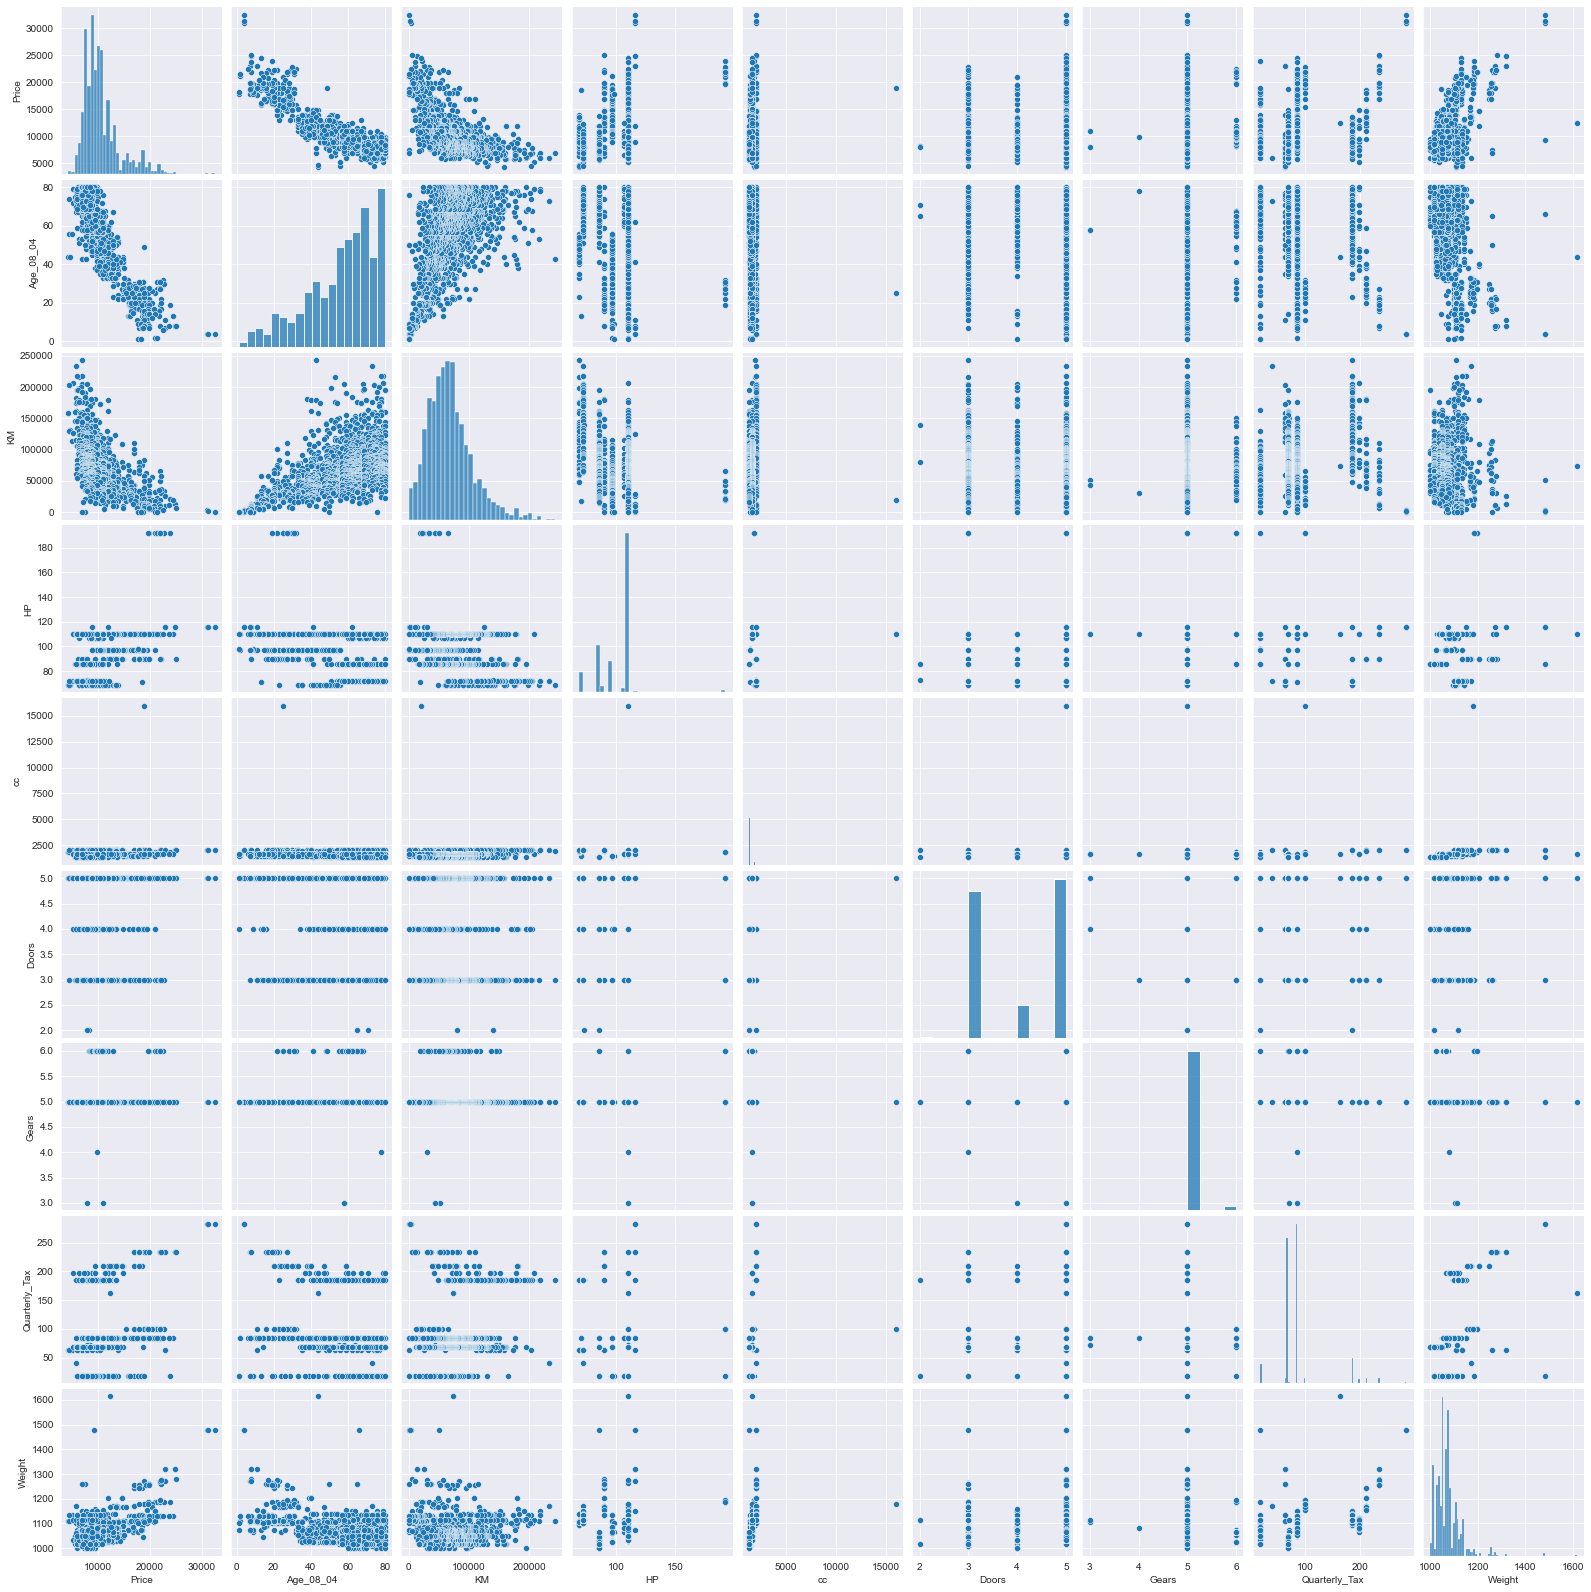

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Model building

In [15]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        00:36:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

By above model we can say that this model is accurate upto some 94% percent. But columns like 'cc' AND 'Doors' are not in the acceptance level. So,far by using some metrics we have to built a better model by droping outliers and unusual values.

## Simple linear model 

In [20]:
ml_cc=smf.ols('Price~cc',data = data).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [21]:
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.55e-06
Time:                        00:41:20   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ml_dd=smf.ols('Price~Doors',data = data).fit()  
#t and p-Values
print(ml_dd.tvalues, '\n', ml_dd.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [23]:
ml_dd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.46e-12
Time:                        00:42:16   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
ml_2=smf.ols('Price~Doors+cc',data = data).fit()  
#t and p-Values
print(ml_2.tvalues, '\n', ml_2.pvalues)

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 
 Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


In [25]:
ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.15e-15
Time:                        00:43:37   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF 

In [28]:
#'Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight'

rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_DO = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_DO = 1/(1-rsq_DO)

rsq_GE = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_GE = 1/(1-rsq_GE) 

rsq_QT = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Gears+Weight+Doors',data=data).fit().rsquared  
vif_QT = 1/(1-rsq_QT)

rsq_WE = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Gears',data=data).fit().rsquared  
vif_WE = 1/(1-rsq_WE) 


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_DO,vif_GE,vif_QT,vif_WE]}

Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


All vif values are less than 10

# Residual analysis
# Test for Normality of Residuals (Q-Q Plot)

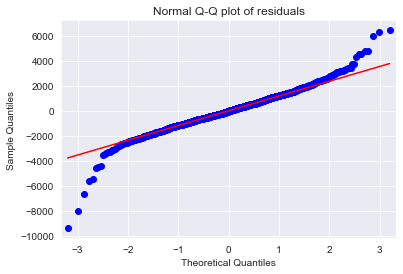

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [32]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

# Model Deletion Diagnostics
## Detecting Influencers/Outliers using Cook's distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

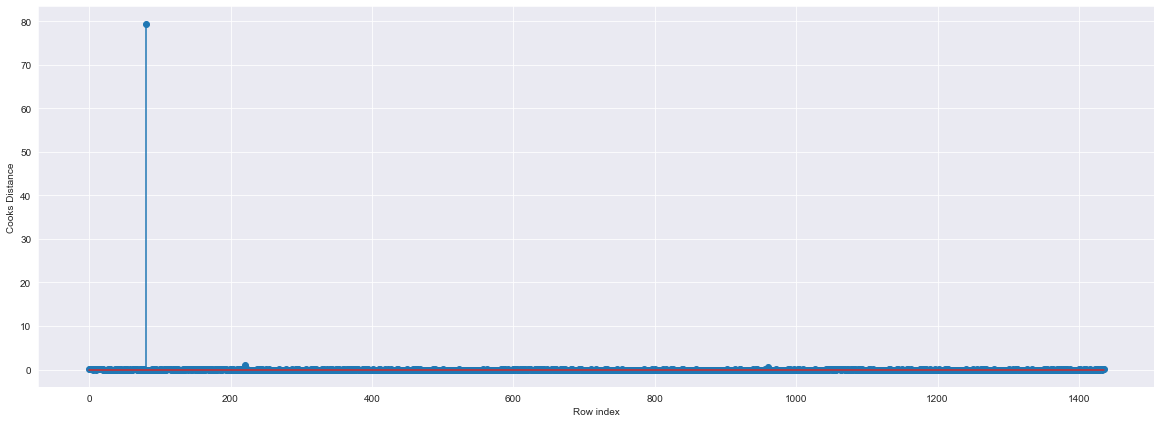

In [34]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
(np.argmax(c),np.max(c))

(80, 79.52010624143533)

In [37]:
data=data.drop(data.index[[80]],axis=0).reset_index()

In [38]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model1

In [39]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        01:09:19   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

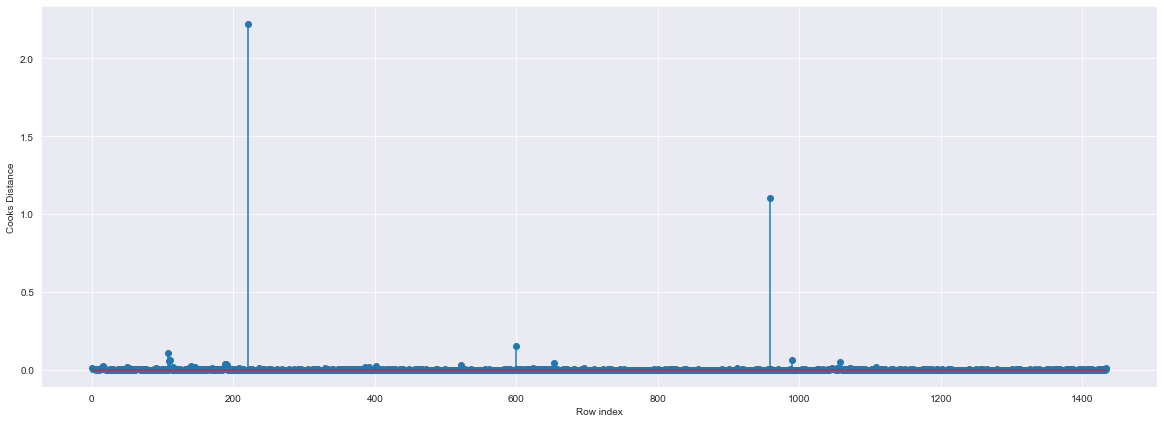

In [41]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c),np.max(c))

(220, 2.2244611713008595)

In [43]:
data=data.drop(data.index[[220]],axis=0).reset_index()

In [44]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model2

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        01:11:25   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age_08_04      -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

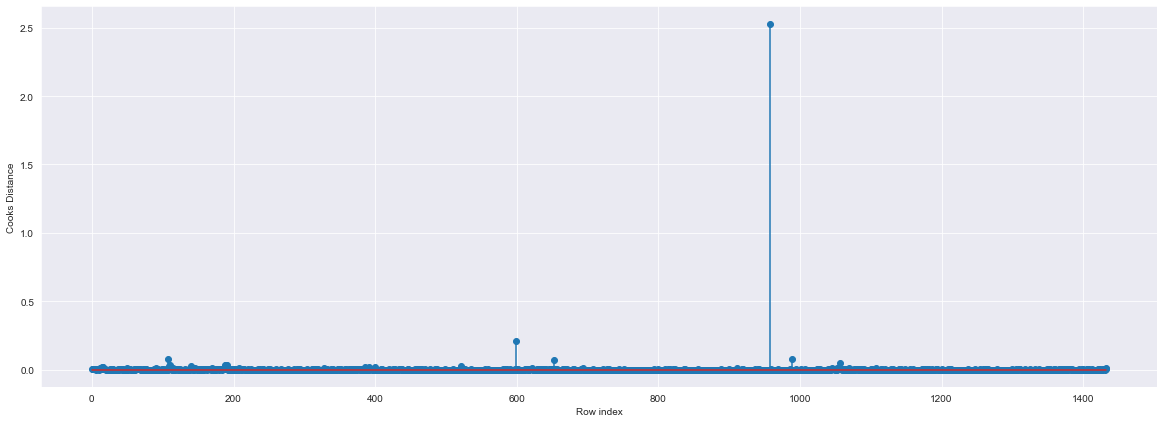

In [47]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
(np.argmax(c),np.max(c))

(958, 2.5312566930232028)

In [50]:
data=data.drop(data.index[[958]],axis=0)

# Final model

In [51]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model3

In [52]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        01:13:56   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

Hence the model with an 86% accuracy level.